**Chapter 10 – Introduction to Artificial Neural Networks**

**第10章 - 人工神经网络（ANN）简介**

_This notebook contains all the sample code and solutions to the exercises in chapter 10._

_这个notebook包含第10章所有的示例代码及练习题解答_

# Setup

First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

In [10]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
# 让输出稳定
def reset_graph(seed=42):
    tf.reset_default_graph() # 
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Perceptrons
# 感知器

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

# 二元分类，预测是否为Setosa
iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width 花瓣长度，宽度
y = (iris.target == 0).astype(np.int) # 布尔转整数

per_clf = Perceptron(max_iter=100, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

In [3]:
y_pred 

array([1])

Saving figure perceptron_iris_plot


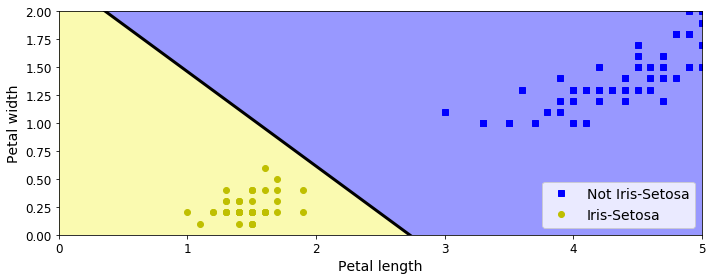

In [4]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1] 
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

save_fig("perceptron_iris_plot")
plt.show()

# Activation functions
# 激活函数

In [5]:
def logit(z):
    return 1 / (1 + np.exp(-z)) # 逻辑函数

def relu(z):
    return np.maximum(0, z) # relu函数

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps) # 求导

Saving figure activation_functions_plot


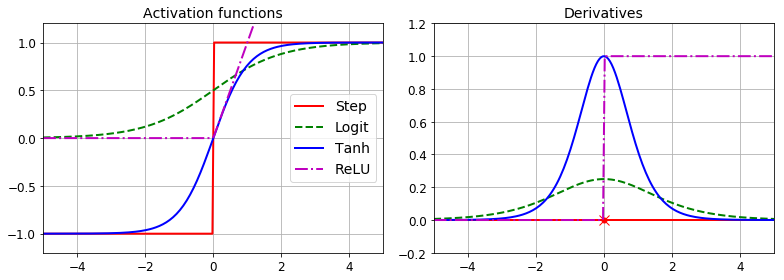

In [6]:
z = np.linspace(-5, 5, 200) # -5到5之间均匀分布的200个数

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=2, label="Step") # 阶跃函数
plt.plot(z, logit(z), "g--", linewidth=2, label="Logit") # 逻辑函数
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh") # t双曲正切（tanh）函数
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU") # relu函数 m:megenta洋红 
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=2, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(logit, z), "g--", linewidth=2, label="Logit")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("activation_functions_plot")
plt.show()

In [14]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def sigmoid(z):
    return 1/(1+np.exp(-z))

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

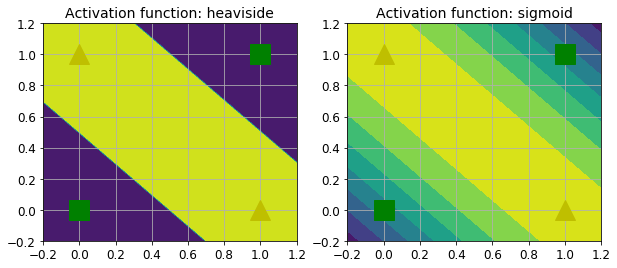

In [16]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

# FNN for MNIST
# mnist数据集上运用FNN

## Using the Estimator API (formerly `tf.contrib.learn`)
## 使用Estimator API（以前的`tf.contrib.learn`）

In [1]:
import tensorflow as tf

/home/zhangxj/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


**Warning**: `tf.examples.tutorials.mnist` is deprecated. We will use `tf.keras.datasets.mnist` instead. Moreover, the `tf.contrib.learn` API was promoted to `tf.estimators` and `tf.feature_columns`, and it has changed considerably. In particular, there is no `infer_real_valued_columns_from_input()` function or `SKCompat` class.

**警告**：`tf.examples.tutorials.mnist`不可用了，我们使用`tf.keras.datasets.mnist`替代。而且，`tf.contrib.learn`API升级为`tf.estimators`和`tf.feature_columns`，而且有了很大的改变。尤其是，没有了`infer_real_valued_columns_from_input()`函数和`SKCompat`类。

In [11]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0 # 三维矩阵重塑为二维矩阵，列数为28×28=784; /255.0对图像归一化处理，使其范围为[0, 1]
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0
y_train = y_train.astype(np.int32) # uint8转int32
y_test = y_test.astype(np.int32)
X_valid, X_train = X_train[:5000], X_train[5000:] # 
y_valid, y_train = y_train[:5000], y_train[5000:]

In [12]:
feature_cols = [tf.feature_column.numeric_column("X", shape=[28 * 28])] # 定义特征列
dnn_clf = tf.estimator.DNNClassifier(hidden_units=[300,100], n_classes=10,
                                     feature_columns=feature_cols) #实例化DNN分类器;hidden_units:两个隐藏层，分别300和100个神经元;n_classes:分10类，即输出层为10个神经元;feature_columns:特征列

input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_train}, y=y_train, num_epochs=40, batch_size=50, shuffle=True) # 定义输入函数;x,y:实例与标签;num_epoch:数据迭代周期;batch_size: 类似小批量梯度下降中每批量的大小。shuffle：为True时将队列打乱。
dnn_clf.train(input_fn=input_fn) # 开始训练

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpef5o9cas', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fc43eadd080>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpef5o9cas/model.ckpt.
INFO:tensorflow:loss = 111.780815, step = 1
INFO:tensor

INFO:tensorflow:loss = 1.0918583, step = 7301 (0.325 sec)
INFO:tensorflow:global_step/sec: 315.08
INFO:tensorflow:loss = 1.0798061, step = 7401 (0.317 sec)
INFO:tensorflow:global_step/sec: 314.28
INFO:tensorflow:loss = 0.2744903, step = 7501 (0.320 sec)
INFO:tensorflow:global_step/sec: 322.916
INFO:tensorflow:loss = 0.2125386, step = 7601 (0.308 sec)
INFO:tensorflow:global_step/sec: 316.009
INFO:tensorflow:loss = 0.26754993, step = 7701 (0.317 sec)
INFO:tensorflow:global_step/sec: 311.833
INFO:tensorflow:loss = 0.18102524, step = 7801 (0.320 sec)
INFO:tensorflow:global_step/sec: 317.517
INFO:tensorflow:loss = 0.23630363, step = 7901 (0.315 sec)
INFO:tensorflow:global_step/sec: 310.148
INFO:tensorflow:loss = 1.5450534, step = 8001 (0.323 sec)
INFO:tensorflow:global_step/sec: 312.641
INFO:tensorflow:loss = 0.42742676, step = 8101 (0.320 sec)
INFO:tensorflow:global_step/sec: 321.108
INFO:tensorflow:loss = 1.0946605, step = 8201 (0.313 sec)
INFO:tensorflow:global_step/sec: 317.645
INFO:ten

INFO:tensorflow:loss = 0.126877, step = 15501 (0.320 sec)
INFO:tensorflow:global_step/sec: 311.731
INFO:tensorflow:loss = 0.2519959, step = 15601 (0.321 sec)
INFO:tensorflow:global_step/sec: 304.729
INFO:tensorflow:loss = 0.011158925, step = 15701 (0.328 sec)
INFO:tensorflow:global_step/sec: 314.244
INFO:tensorflow:loss = 0.114383355, step = 15801 (0.318 sec)
INFO:tensorflow:global_step/sec: 314.732
INFO:tensorflow:loss = 0.16539742, step = 15901 (0.318 sec)
INFO:tensorflow:global_step/sec: 302.57
INFO:tensorflow:loss = 0.029493548, step = 16001 (0.330 sec)
INFO:tensorflow:global_step/sec: 308.997
INFO:tensorflow:loss = 0.07467363, step = 16101 (0.324 sec)
INFO:tensorflow:global_step/sec: 312.619
INFO:tensorflow:loss = 0.0994162, step = 16201 (0.320 sec)
INFO:tensorflow:global_step/sec: 304.83
INFO:tensorflow:loss = 0.25762385, step = 16301 (0.328 sec)
INFO:tensorflow:global_step/sec: 303.062
INFO:tensorflow:loss = 0.1237788, step = 16401 (0.330 sec)
INFO:tensorflow:global_step/sec: 30

INFO:tensorflow:global_step/sec: 316.349
INFO:tensorflow:loss = 0.0027646052, step = 23701 (0.316 sec)
INFO:tensorflow:global_step/sec: 304.843
INFO:tensorflow:loss = 0.02114948, step = 23801 (0.328 sec)
INFO:tensorflow:global_step/sec: 311.11
INFO:tensorflow:loss = 0.079031065, step = 23901 (0.321 sec)
INFO:tensorflow:global_step/sec: 308.146
INFO:tensorflow:loss = 0.05990723, step = 24001 (0.325 sec)
INFO:tensorflow:global_step/sec: 305.62
INFO:tensorflow:loss = 0.028723562, step = 24101 (0.327 sec)
INFO:tensorflow:global_step/sec: 321.221
INFO:tensorflow:loss = 0.011850528, step = 24201 (0.311 sec)
INFO:tensorflow:global_step/sec: 309.921
INFO:tensorflow:loss = 0.033385336, step = 24301 (0.323 sec)
INFO:tensorflow:global_step/sec: 318.588
INFO:tensorflow:loss = 0.044025645, step = 24401 (0.314 sec)
INFO:tensorflow:global_step/sec: 314.7
INFO:tensorflow:loss = 0.19095513, step = 24501 (0.319 sec)
INFO:tensorflow:global_step/sec: 310.108
INFO:tensorflow:loss = 0.046910904, step = 2460

INFO:tensorflow:global_step/sec: 316.604
INFO:tensorflow:loss = 0.033709206, step = 31801 (0.316 sec)
INFO:tensorflow:global_step/sec: 312.338
INFO:tensorflow:loss = 0.007022989, step = 31901 (0.320 sec)
INFO:tensorflow:global_step/sec: 314.137
INFO:tensorflow:loss = 0.04764556, step = 32001 (0.318 sec)
INFO:tensorflow:global_step/sec: 311.599
INFO:tensorflow:loss = 0.013485136, step = 32101 (0.321 sec)
INFO:tensorflow:global_step/sec: 312.823
INFO:tensorflow:loss = 0.008174633, step = 32201 (0.320 sec)
INFO:tensorflow:global_step/sec: 317.776
INFO:tensorflow:loss = 0.025245465, step = 32301 (0.315 sec)
INFO:tensorflow:global_step/sec: 314.968
INFO:tensorflow:loss = 0.009170952, step = 32401 (0.317 sec)
INFO:tensorflow:global_step/sec: 317.037
INFO:tensorflow:loss = 0.031049363, step = 32501 (0.315 sec)
INFO:tensorflow:global_step/sec: 301.839
INFO:tensorflow:loss = 0.03124824, step = 32601 (0.331 sec)
INFO:tensorflow:global_step/sec: 318.587
INFO:tensorflow:loss = 0.016158927, step = 

INFO:tensorflow:global_step/sec: 318.566
INFO:tensorflow:loss = 0.04105402, step = 39901 (0.314 sec)
INFO:tensorflow:global_step/sec: 304.13
INFO:tensorflow:loss = 0.0055373367, step = 40001 (0.329 sec)
INFO:tensorflow:global_step/sec: 314.152
INFO:tensorflow:loss = 0.04081005, step = 40101 (0.319 sec)
INFO:tensorflow:global_step/sec: 316.413
INFO:tensorflow:loss = 0.0030397002, step = 40201 (0.316 sec)
INFO:tensorflow:global_step/sec: 308.276
INFO:tensorflow:loss = 0.009227021, step = 40301 (0.324 sec)
INFO:tensorflow:global_step/sec: 318.187
INFO:tensorflow:loss = 0.020871505, step = 40401 (0.314 sec)
INFO:tensorflow:global_step/sec: 317.454
INFO:tensorflow:loss = 0.0074155447, step = 40501 (0.315 sec)
INFO:tensorflow:global_step/sec: 317.614
INFO:tensorflow:loss = 0.012822457, step = 40601 (0.315 sec)
INFO:tensorflow:global_step/sec: 314.096
INFO:tensorflow:loss = 0.0347273, step = 40701 (0.318 sec)
INFO:tensorflow:global_step/sec: 317.237
INFO:tensorflow:loss = 0.018538067, step = 

In [14]:
test_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X": X_test}, y=y_test, shuffle=False) # 测试集的输入函数
eval_results = dnn_clf.evaluate(input_fn=test_input_fn) # 对训练好的DNN分类器输入测试集来进行评估

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-12-10-06:30:27
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpef5o9cas/model.ckpt-44000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2018-12-10-06:30:27
INFO:tensorflow:Saving dict for global step 44000: accuracy = 0.9803, average_loss = 0.10239366, global_step = 44000, loss = 12.961223


In [15]:
eval_results # 评估结果

{'accuracy': 0.9803,
 'average_loss': 0.10239366,
 'global_step': 44000,
 'loss': 12.961223}

In [16]:
y_pred_iter = dnn_clf.predict(input_fn=test_input_fn) # 输入测试集进行预测,返回生成器
y_pred = list(y_pred_iter) # 生成器转换为列表
y_pred[0] # 第一个预测

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpef5o9cas/model.ckpt-44000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


{'class_ids': array([7]),
 'classes': array([b'7'], dtype=object),
 'logits': array([ -7.381111 ,   0.7214664,  -0.6627069,   4.4830103,  -1.9302189,
         -6.9162908, -21.178396 ,  22.122177 ,  -1.8814406,   3.0483098],
       dtype=float32),
 'probabilities': array([1.5377463e-13, 5.0791293e-10, 1.2724796e-10, 2.1847752e-08,
        3.5824226e-11, 2.4476756e-13, 1.5660265e-19, 1.0000000e+00,
        3.7614998e-11, 5.2038462e-09], dtype=float32)}

## Using plain TensorFlow
## 使用素的Tensorflow

In [18]:
import tensorflow as tf

n_inputs = 28*28  # MNIST 输入
n_hidden1 = 300 # 300个神经元的隐藏层
n_hidden2 = 100 # 100个神经元的隐藏层
n_outputs = 10 # 10个输出

In [16]:
reset_graph() # In[1]定义的函数

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X") # 定义占位符，类型为float32，大小为输入层大小;占位符相当于形参，先定义结构，后续再进行赋值。
y = tf.placeholder(tf.int32, shape=(None), name="y")

In [17]:
def neuron_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        stddev = 2 / np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        W = tf.Variable(init, name="kernel")
        b = tf.Variable(tf.zeros([n_neurons]), name="bias")
        Z = tf.matmul(X, W) + b
        if activation is not None:
            return activation(Z)
        else:
            return Z

In [18]:
with tf.name_scope("dnn"):
    hidden1 = neuron_layer(X, n_hidden1, name="hidden1",
                           activation=tf.nn.relu)
    hidden2 = neuron_layer(hidden1, n_hidden2, name="hidden2",
                           activation=tf.nn.relu)
    logits = neuron_layer(hidden2, n_outputs, name="outputs")

In [19]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                              logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [20]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [21]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [22]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [23]:
n_epochs = 40
batch_size = 50

In [24]:
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

In [25]:
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_val = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "Batch accuracy:", acc_batch, "Val accuracy:", acc_val)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Batch accuracy: 0.9 Val accuracy: 0.9146
1 Batch accuracy: 0.92 Val accuracy: 0.936
2 Batch accuracy: 0.96 Val accuracy: 0.945
3 Batch accuracy: 0.92 Val accuracy: 0.9512
4 Batch accuracy: 0.98 Val accuracy: 0.9558
5 Batch accuracy: 0.96 Val accuracy: 0.9566
6 Batch accuracy: 1.0 Val accuracy: 0.9612
7 Batch accuracy: 0.94 Val accuracy: 0.963
8 Batch accuracy: 0.98 Val accuracy: 0.9652
9 Batch accuracy: 0.96 Val accuracy: 0.966
10 Batch accuracy: 0.92 Val accuracy: 0.9688
11 Batch accuracy: 0.98 Val accuracy: 0.969
12 Batch accuracy: 0.98 Val accuracy: 0.967
13 Batch accuracy: 0.98 Val accuracy: 0.9706
14 Batch accuracy: 1.0 Val accuracy: 0.9714
15 Batch accuracy: 0.94 Val accuracy: 0.9732
16 Batch accuracy: 1.0 Val accuracy: 0.9736
17 Batch accuracy: 1.0 Val accuracy: 0.9742
18 Batch accuracy: 1.0 Val accuracy: 0.9746
19 Batch accuracy: 0.98 Val accuracy: 0.9748
20 Batch accuracy: 1.0 Val accuracy: 0.9752
21 Batch accuracy: 1.0 Val accuracy: 0.9752
22 Batch accuracy: 0.98 Val accura

In [26]:
with tf.Session() as sess:
    saver.restore(sess, "./my_model_final.ckpt") # or better, use save_path
    X_new_scaled = X_test[:20]
    Z = logits.eval(feed_dict={X: X_new_scaled})
    y_pred = np.argmax(Z, axis=1)

INFO:tensorflow:Restoring parameters from ./my_model_final.ckpt


In [27]:
print("Predicted classes:", y_pred)
print("Actual classes:   ", y_test[:20])

Predicted classes: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
Actual classes:    [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


In [28]:
from tensorflow_graph_in_jupyter import show_graph

In [29]:
show_graph(tf.get_default_graph())

## Using `dense()` instead of `neuron_layer()`

Note: previous releases of the book used `tensorflow.contrib.layers.fully_connected()` rather than `tf.layers.dense()` (which did not exist when this chapter was written). It is now preferable to use `tf.layers.dense()`, because anything in the contrib module may change or be deleted without notice. The `dense()` function is almost identical to the `fully_connected()` function, except for a few minor differences:
* several parameters are renamed: `scope` becomes `name`, `activation_fn` becomes `activation` (and similarly the `_fn` suffix is removed from other parameters such as `normalizer_fn`), `weights_initializer` becomes `kernel_initializer`, etc.
* the default `activation` is now `None` rather than `tf.nn.relu`.
* a few more differences are presented in chapter 11.

In [30]:
n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [31]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y") 

In [32]:
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1",
                              activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",
                              activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")
    y_proba = tf.nn.softmax(logits)

In [33]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [34]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [35]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [36]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [37]:
n_epochs = 20
n_batches = 50

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_batch = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_valid = accuracy.eval(feed_dict={X: X_valid, y: y_valid})
        print(epoch, "Batch accuracy:", acc_batch, "Validation accuracy:", acc_valid)

    save_path = saver.save(sess, "./my_model_final.ckpt")

0 Batch accuracy: 0.9 Validation accuracy: 0.9024
1 Batch accuracy: 0.92 Validation accuracy: 0.9254
2 Batch accuracy: 0.94 Validation accuracy: 0.9372
3 Batch accuracy: 0.9 Validation accuracy: 0.9416
4 Batch accuracy: 0.94 Validation accuracy: 0.9472
5 Batch accuracy: 0.94 Validation accuracy: 0.9512
6 Batch accuracy: 1.0 Validation accuracy: 0.9548
7 Batch accuracy: 0.94 Validation accuracy: 0.961
8 Batch accuracy: 0.96 Validation accuracy: 0.962
9 Batch accuracy: 0.94 Validation accuracy: 0.9648
10 Batch accuracy: 0.92 Validation accuracy: 0.9656
11 Batch accuracy: 0.98 Validation accuracy: 0.9668
12 Batch accuracy: 0.98 Validation accuracy: 0.9684
13 Batch accuracy: 0.98 Validation accuracy: 0.9702
14 Batch accuracy: 1.0 Validation accuracy: 0.9696
15 Batch accuracy: 0.94 Validation accuracy: 0.9718
16 Batch accuracy: 0.98 Validation accuracy: 0.9728
17 Batch accuracy: 1.0 Validation accuracy: 0.973
18 Batch accuracy: 0.98 Validation accuracy: 0.9748
19 Batch accuracy: 0.98 Valida

In [38]:
show_graph(tf.get_default_graph())

# Exercise solutions

## 1. to 8.

See appendix A.

## 9.

_Train a deep MLP on the MNIST dataset and see if you can get over 98% precision. Just like in the last exercise of chapter 9, try adding all the bells and whistles (i.e., save checkpoints, restore the last checkpoint in case of an interruption, add summaries, plot learning curves using TensorBoard, and so on)._

First let's create the deep net. It's exactly the same as earlier, with just one addition: we add a `tf.summary.scalar()` to track the loss and the accuracy during training, so we can view nice learning curves using TensorBoard.

In [40]:
n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [41]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y") 

In [42]:
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1",
                              activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",
                              activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")

In [43]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")
    loss_summary = tf.summary.scalar('log_loss', loss)

In [44]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [45]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    accuracy_summary = tf.summary.scalar('accuracy', accuracy)

In [46]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

Now we need to define the directory to write the TensorBoard logs to:

In [47]:
from datetime import datetime

def log_dir(prefix=""):
    now = datetime.utcnow().strftime("%Y%m%d%H%M%S")
    root_logdir = "tf_logs"
    if prefix:
        prefix += "-"
    name = prefix + "run-" + now
    return "{}/{}/".format(root_logdir, name)

In [48]:
logdir = log_dir("mnist_dnn")

Now we can create the `FileWriter` that we will use to write the TensorBoard logs:

In [49]:
file_writer = tf.summary.FileWriter(logdir, tf.get_default_graph())

Hey! Why don't we implement early stopping? For this, we are going to need to use the validation set.

In [50]:
m, n = X_train.shape

In [52]:
n_epochs = 10001
batch_size = 50
n_batches = int(np.ceil(m / batch_size))

checkpoint_path = "/tmp/my_deep_mnist_model.ckpt"
checkpoint_epoch_path = checkpoint_path + ".epoch"
final_model_path = "./my_deep_mnist_model"

best_loss = np.infty
epochs_without_progress = 0
max_epochs_without_progress = 50

with tf.Session() as sess:
    if os.path.isfile(checkpoint_epoch_path):
        # if the checkpoint file exists, restore the model and load the epoch number
        with open(checkpoint_epoch_path, "rb") as f:
            start_epoch = int(f.read())
        print("Training was interrupted. Continuing at epoch", start_epoch)
        saver.restore(sess, checkpoint_path)
    else:
        start_epoch = 0
        sess.run(init)

    for epoch in range(start_epoch, n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        accuracy_val, loss_val, accuracy_summary_str, loss_summary_str = sess.run([accuracy, loss, accuracy_summary, loss_summary], feed_dict={X: X_valid, y: y_valid})
        file_writer.add_summary(accuracy_summary_str, epoch)
        file_writer.add_summary(loss_summary_str, epoch)
        if epoch % 5 == 0:
            print("Epoch:", epoch,
                  "\tValidation accuracy: {:.3f}%".format(accuracy_val * 100),
                  "\tLoss: {:.5f}".format(loss_val))
            saver.save(sess, checkpoint_path)
            with open(checkpoint_epoch_path, "wb") as f:
                f.write(b"%d" % (epoch + 1))
            if loss_val < best_loss:
                saver.save(sess, final_model_path)
                best_loss = loss_val
            else:
                epochs_without_progress += 5
                if epochs_without_progress > max_epochs_without_progress:
                    print("Early stopping")
                    break

Epoch: 0 	Validation accuracy: 92.180% 	Loss: 0.30208
Epoch: 5 	Validation accuracy: 95.980% 	Loss: 0.15037
Epoch: 10 	Validation accuracy: 97.100% 	Loss: 0.11160
Epoch: 15 	Validation accuracy: 97.700% 	Loss: 0.09562
Epoch: 20 	Validation accuracy: 97.840% 	Loss: 0.08309
Epoch: 25 	Validation accuracy: 98.040% 	Loss: 0.07706
Epoch: 30 	Validation accuracy: 98.140% 	Loss: 0.07287
Epoch: 35 	Validation accuracy: 98.280% 	Loss: 0.07133
Epoch: 40 	Validation accuracy: 98.220% 	Loss: 0.06968
Epoch: 45 	Validation accuracy: 98.220% 	Loss: 0.06993
Epoch: 50 	Validation accuracy: 98.160% 	Loss: 0.07093
Epoch: 55 	Validation accuracy: 98.280% 	Loss: 0.06994
Epoch: 60 	Validation accuracy: 98.200% 	Loss: 0.06894
Epoch: 65 	Validation accuracy: 98.260% 	Loss: 0.06906
Epoch: 70 	Validation accuracy: 98.220% 	Loss: 0.07057
Epoch: 75 	Validation accuracy: 98.280% 	Loss: 0.06963
Epoch: 80 	Validation accuracy: 98.320% 	Loss: 0.07264
Epoch: 85 	Validation accuracy: 98.200% 	Loss: 0.07403
Epoch: 90 	V

In [53]:
os.remove(checkpoint_epoch_path)

In [54]:
with tf.Session() as sess:
    saver.restore(sess, final_model_path)
    accuracy_val = accuracy.eval(feed_dict={X: X_test, y: y_test})

INFO:tensorflow:Restoring parameters from ./my_deep_mnist_model


In [55]:
accuracy_val

0.9796